In [251]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
import scipy.stats as stats

from ucimlrepo import fetch_ucirepo 
import pandas as pd

In [252]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45)

In [253]:
# data (as pandas dataframes) 
data = heart_disease.data.features 
labels = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [255]:
for column in data:
    todel = np.where(data[column].isna())[0]
    labels.drop(index=todel, inplace=True)
data = data.dropna()

/var/folders/sb/75v06dpj77ldyknd005qr5kw0000gn/T/ipykernel_49075/3217054214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels.drop(index=todel, inplace=True)
/var/folders/sb/75v06dpj77ldyknd005qr5kw0000gn/T/ipykernel_49075/3217054214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels.drop(index=todel, inplace=True)
/var/folders/sb/75v06dpj77ldyknd005qr5kw0000gn/T/ipykernel_49075/3217054214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [256]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     297 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 32.5 KB


In [258]:
counts = np.unique(labels, return_counts=True)
counts

(array([0, 1, 2, 3, 4]), array([160,  54,  35,  35,  13]))

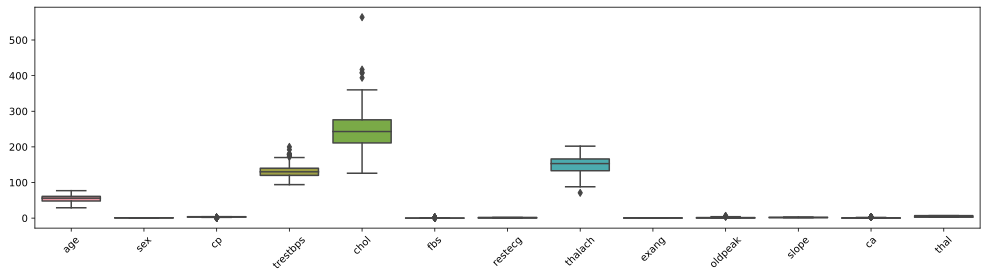

In [259]:
# plot some data
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [260]:
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop(['sex','fbs','exang'])
cols2zscore

for c in cols2zscore:
  d = pd.to_numeric(data[c]) # force to numeric (addresses some data-format issues)
  data[c] = (d - d.mean())/d.std(ddof=1)

/var/folders/sb/75v06dpj77ldyknd005qr5kw0000gn/T/ipykernel_49075/365936555.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c] = (d - d.mean())/d.std(ddof=1)


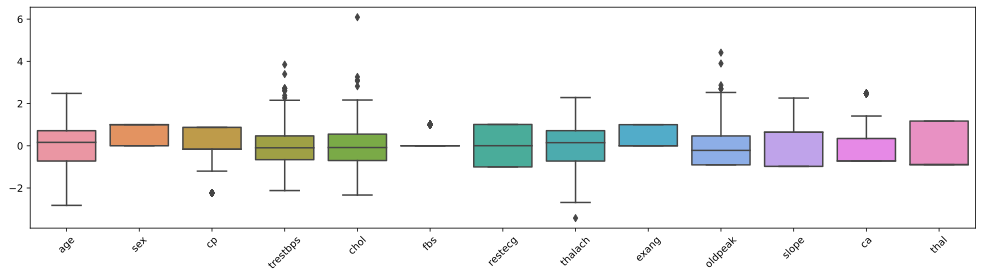

In [261]:
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [262]:
labels[labels>0]=1

/var/folders/sb/75v06dpj77ldyknd005qr5kw0000gn/T/ipykernel_49075/2139308049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[labels>0]=1
/var/folders/sb/75v06dpj77ldyknd005qr5kw0000gn/T/ipykernel_49075/2139308049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[labels>0]=1


In [263]:
counts = np.unique(labels, return_counts=True)
counts

(array([0, 1]), array([160, 137]))

In [264]:
dataT = torch.Tensor(data.values).float()
labelsT = torch.Tensor(labels.values).float()

In [265]:
labelsT.shape

torch.Size([297, 1])

In [266]:
train_data, test_data, train_labels, test_labels = train_test_split(dataT, labelsT, test_size=50)

In [267]:
train_data.shape

torch.Size([247, 13])

In [285]:
train_dataT = TensorDataset(train_data, train_labels)
test_dataT = TensorDataset(test_data, test_labels)

train_loader = DataLoader(train_dataT, batch_size=20, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataT, batch_size=test_dataT.tensors[0].shape[0])

In [305]:
class model(nn.Module):
    def __init__(self):
        super().__init__()

        self.input = nn.Linear(13, 64)
        self.h1 = nn.Linear(64, 32)
        self.h2 = nn.Linear(32, 10)
        self.output = nn.Linear(10, 1)

    def forward(self, data):
        x = F.relu(self.input(data))
        x = F.relu(self.h1(x))
        x = F.relu(self.h2(x))
        x = self.output(x)

        return x



In [287]:
def getModel():

    ANN = model()
    lossFunction = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(params=ANN.parameters(), lr=0.0001)

    return ANN, lossFunction, optimizer

In [271]:
test_dataT.tensors[0].shape

torch.Size([50, 13])

In [311]:
epochs = 100

def trainModel(ANN, lossFunction, optimizer):

    trainLosses = torch.zeros(epochs)
    testLosses = torch.zeros(epochs)
    trainAcc = []
    testAcc = []

    for _ in range(epochs):
        batchAcc = []
        batchLoss = []
        for x, y in train_loader:
            yHat = ANN.forward(x)

            loss = lossFunction(yHat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batchLoss.append(loss.item())
            batchAcc.append(torch.mean(((yHat>0).float() == y).float())*100)

        trainAcc.append(np.mean(batchAcc))
        trainLosses[_] = np.mean(batchLoss)

        X, Y = next(iter(test_loader))
        with torch.no_grad():
            pred = ANN(X)
        testAcc.append(torch.mean(((pred>0).float() == Y).float())*100)
        testLosses[_] = lossFunction(pred, Y).item()

    return trainAcc, testAcc, trainLosses, testLosses
    


In [314]:
ANN, lossFunction, optimizer = getModel()
trainAcc, testAcc, trainLosses, testLosses = trainModel(ANN, lossFunction, optimizer)
print('Model instance %s, final train/devset accuracy: %g%%, %g%%' %(i, trainAcc[-1], testAcc[-1]))

Model instance 0, final train/devset accuracy: 88.3333%, 84%


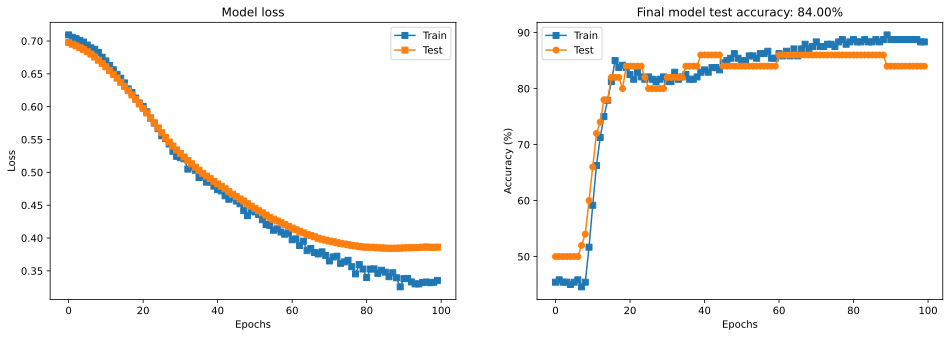

In [315]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(trainLosses,'s-',label='Train')
ax[0].plot(testLosses,'s-',label='Test')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')
ax[0].legend()

ax[1].plot(trainAcc,'s-',label='Train')
ax[1].plot(testAcc,'o-',label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()